In [2]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def create_model(input_shape=(224, 224, 3)):

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [4]:
def prepare_data(data_dir, img_height=224, img_width=224, batch_size=32):

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

In [5]:
def train_model(model, train_generator, validation_generator, epochs=50):

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Add early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        callbacks=[early_stopping]
    )

    return history

In [6]:
def plot_training_history(history):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

In [7]:
def evaluate_model(model, test_generator):

    # Get predictions
    predictions = model.predict(test_generator)
    predicted_classes = (predictions > 0.5).astype(int)
    true_classes = test_generator.classes

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_classes, predicted_classes))

    # Create confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

GPU Available:  []
Found 424 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,729 (9.50 MB)

 Trainable params: 2,489,729 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.8243 - loss: 0.5875 - val_accuracy: 0.8365 - val_loss: 0.5969
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8360 - loss: 0.5603 - val_accuracy: 0.8365 - val_loss: 0.4825
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8393 - loss: 0.4812 - val_accuracy: 0.8365 - val_loss: 0.4648
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8552 - loss: 0.4413 - val_accuracy: 0.8365 - val_loss: 0.4587
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8222 - loss: 0.4803 - val_accuracy: 0.8365 - val_loss: 0.4427
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8274 - loss: 0.4682 - val_accuracy: 0.8365 - val_loss: 0.4541
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8444 - loss: 0.4401 - val_accuracy: 0.8365 - val_loss: 0.4411
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8244 - loss: 0.4664 - val_accuracy: 0.8365 - val_loss:

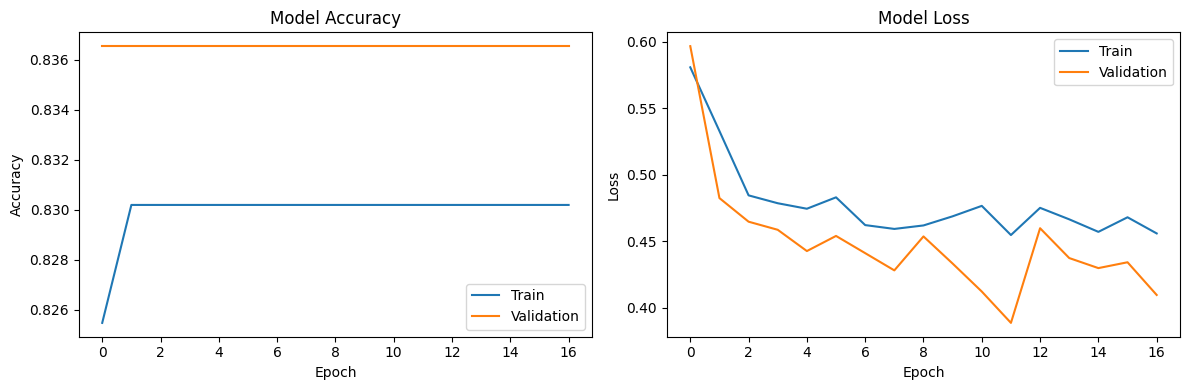

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.84      1.00      0.91        87

    accuracy                           0.84       104
   macro avg       0.42      0.50      0.46       104
weighted avg       0.70      0.84      0.76       104



c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

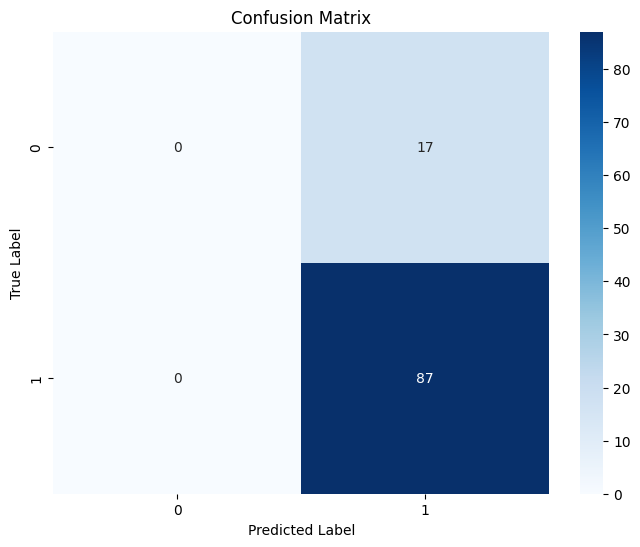

In [8]:
def main():
    # Set parameters
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    BATCH_SIZE = 32
    EPOCHS = 50
    
    # Replace with your dataset directory
    DATA_DIR = 'dataset'
    
    # Ensure GPU is being used if available
    print("GPU Available: ", tf.config.list_physical_devices('GPU'))
    
    # Prepare data
    train_generator, validation_generator = prepare_data(
        DATA_DIR,
        IMG_HEIGHT,
        IMG_WIDTH,
        BATCH_SIZE
    )
    
    # Create and train model
    model = create_model((IMG_HEIGHT, IMG_WIDTH, 3))
    model.summary()
    
    # Train model
    history = train_model(model, train_generator, validation_generator, EPOCHS)
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate model
    evaluate_model(model, validation_generator)
    
    # Save model
    model.save('oral_cancer_model.keras')

if __name__ == "__main__":
    main()

GPU Available:  []
Found 528 files belonging to 2 classes.
Using 423 files for training.
Found 528 files belonging to 2 classes.
Using 105 files for validation.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Found 528 files belonging to 2 classes.
Using 423 files for training.
Class Names: ['Normal', 'OSCC']
Class Weights: {0: 2.9788732394366195, 1: 0.6008522727272727}
Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5543 - loss: 1.0653 - val_accuracy: 0.8190 - val_loss: 0.4884 - learning_rate: 1.0000e-04
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5529 - loss: 0.9441 - val_accuracy: 0.8190 - val_loss: 0.4862 - learning_rate: 1.0000e-04
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4705 - loss: 0.9984 - val_accuracy: 0.8381 - val_loss: 0.4824 - learning_rate: 1.0000e-04
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4833 - loss: 1.1047 - val_accuracy: 0.8381 - val_loss: 0.4782 - learning_rate: 1.0000e-04
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4671 - loss: 1.0387 - val_accuracy: 0.8286 - val_loss: 0.4787 - learning_rate: 1.0000e-04
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.50

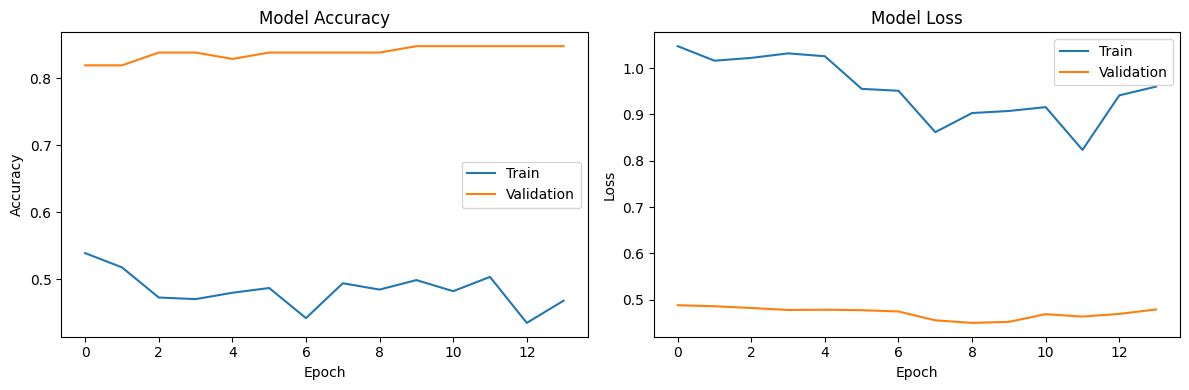

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021D19114EA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 974ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.84      1.00      0.91        88

    accu

c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

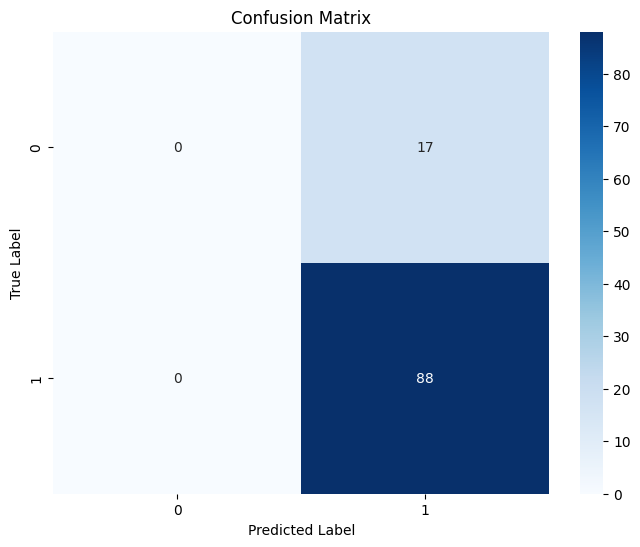

In [9]:
def create_resnet_model(input_shape=(224, 224, 3)):

    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

def prepare_data(data_dir, img_height=224, img_width=224, batch_size=32):
    
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),
    ])
    
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset='training',
        seed=42,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    val_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset='validation',
        seed=42,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
    val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

    return train_dataset, val_dataset

def train_model(model, train_dataset, val_dataset, epochs=25):
    raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
        'dataset',
        validation_split=0.2,
        subset='training',
        seed=123
    )
    class_names = raw_train_dataset.class_names
    
    class_labels = np.concatenate([y.numpy() for _, y in raw_train_dataset], axis=0)
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(class_labels),
        y=class_labels
    )
    class_weights = dict(enumerate(class_weights))
    
    print("Class Names:", class_names)
    print("Class Weights:", class_weights)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
    )

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]
    )

    return history

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_dataset):

    predictions = model.predict(test_dataset)
    predicted_classes = (predictions > 0.5).astype(int)
    true_classes = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_classes, predicted_classes))

    # Create confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def main():
    # Set parameters
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    BATCH_SIZE = 32
    EPOCHS = 25
    
    # Replace with your dataset directory
    DATA_DIR = 'dataset'
    
    # Ensure GPU is being used if available
    print("GPU Available: ", tf.config.list_physical_devices('GPU'))
    
    # Prepare data
    train_dataset, val_dataset = prepare_data(
        DATA_DIR,
        IMG_HEIGHT,
        IMG_WIDTH,
        BATCH_SIZE
    )
    
    # Create and train model
    model = create_resnet_model((IMG_HEIGHT, IMG_WIDTH, 3))
    model.summary()
    
    # Train model
    history = train_model(model, train_dataset, val_dataset, EPOCHS)
    
    # Plot training history
    plot_training_history(history)
    
    # Evaluate model
    evaluate_model(model, val_dataset)
    
    # Save model
    model.save('oral_cancer_mobilenet_model.keras')

if __name__ == "__main__":
    main()

In [ ]:
def oversample_dataset(dataset, class_counts, img_height=224, img_width=224):

    # Split dataset by classes
    class_0 = dataset.filter(lambda x, y: tf.equal(y, 0))  # Class 0 (OSCC)
    class_1 = dataset.filter(lambda x, y: tf.equal(y, 1))  # Class 1 (Normal)

    # Calculate the number of samples needed to balance the classes
    class_0_count = class_counts[0]
    class_1_count = class_counts[1]
    max_count = max(class_0_count, class_1_count)

    if class_0_count < max_count:
        class_0 = class_0.repeat().take(max_count)
    elif class_1_count < max_count:
        class_1 = class_1.repeat().take(max_count)

    # Combine the datasets
    balanced_dataset = class_0.concatenate(class_1)
    balanced_dataset = balanced_dataset.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

    return balanced_dataset

def create_resnet_model(input_shape=(224, 224, 3)):

    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

def prepare_data_with_oversampling(data_dir, img_height=224, img_width=224, batch_size=32):

    train_dataset = image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    val_dataset = image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    # Count class occurrences in the training dataset
    class_names = train_dataset.class_names
    class_counts = [0, 0]
    for _, y in train_dataset.unbatch():
        class_counts[int(y.numpy())] += 1

    print(f"Class counts before oversampling: {class_counts}")

    # Apply oversampling
    train_dataset = train_dataset.unbatch()  # Unbatch the dataset for processing
    train_dataset = oversample_dataset(train_dataset, class_counts, img_height, img_width)

    # Prefetch validation dataset for performance
    val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return train_dataset, val_dataset

def train_model(model, train_dataset, val_dataset, epochs=25, class_weights=None):
    raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
        'dataset',
        validation_split=0.2,
        subset='training',
        seed=123
    )
    class_names = raw_train_dataset.class_names
    
    class_labels = np.concatenate([y.numpy() for _, y in raw_train_dataset], axis=0)
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(class_labels),
        y=class_labels
    )
    class_weights = dict(enumerate(class_weights))
    
    print("Class Names:", class_names)
    print("Class Weights:", class_weights)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
    )

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=[early_stopping, lr_scheduler, tensorboard_callback]
    )

    return history

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_dataset):

    predictions = model.predict(test_dataset)
    predicted_classes = (predictions > 0.5).astype(int)
    true_classes = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(true_classes, predicted_classes))

    # Create confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


def main():
    # Parameters
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    BATCH_SIZE = 32
    EPOCHS = 20

    DATA_DIR = 'dataset'  # Replace with your dataset folder

    # Prepare data with oversampling
    train_dataset, val_dataset = prepare_data_with_oversampling(DATA_DIR, IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE)

    # Compute class weights (optional after oversampling)
    class_weights = None

    # Create and train model
    model = create_resnet_model((IMG_HEIGHT, IMG_WIDTH, 3))
    model.summary()

    history = train_model(model, train_dataset, val_dataset, EPOCHS, class_weights)

    # Plot training history
    plot_training_history(history)

    # Save the model
    model.save('oral_cancer_oversampled_mobilenet_model.keras')

if __name__ == "__main__":
    main()

Found 528 files belonging to 2 classes.
Using 423 files for training.
Found 528 files belonging to 2 classes.
Using 105 files for validation.
Class counts before oversampling: [72, 351]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Found 528 files belonging to 2 classes.
Using 423 files for training.
Class Names: ['Normal', 'OSCC']
Class Weights: {0: 2.9788732394366195, 1: 0.6008522727272727}
Epoch 1/20
     22/Unknown 72s 506ms/step - accuracy: 0.4925 - loss: 2.6363

c:\Users\EliteBook\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 782ms/step - accuracy: 0.4925 - loss: 2.6073 - val_accuracy: 0.1619 - val_loss: 3.0908 - learning_rate: 1.0000e-04
Epoch 2/20
